<a href="https://colab.research.google.com/github/fukzuawa/sklearn/blob/master/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#データインポート
from sklearn.datasets import load_iris
iris = load_iris()
iris

In [0]:
#わかりやすい変数に代入
#データフレームに持たせてもいいかも

X = iris.data
y = iris.target

In [0]:
# 決定木を実行
"""
sklearn.tree.DecisionTreeClassifier(criterion='gini',
  splitter='best', max_depth=None, min_samples_split=2,
  min_samples_leaf=1, min_weight_fraction_leaf=0.0,
  max_features=None, random_state=None,
  max_leaf_nodes=None, class_weight=None, presort=False)

random_state,max_depth,max_weight_fraction_leaf
を変えればいい感じになる
"""
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0,  max_depth=3)
clf = clf.fit(X, y)

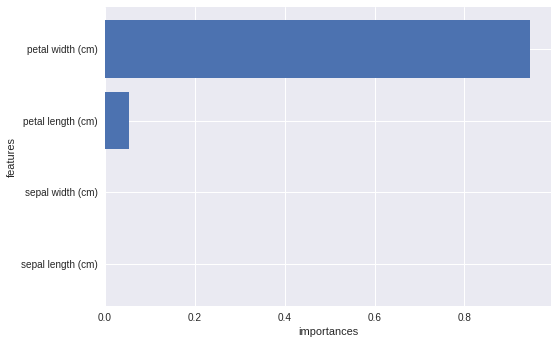

In [55]:
import matplotlib.pyplot as plt
import numpy as np
 

n_features = X.shape[1] # 全説明変数
plt.barh(range(n_features), clf.feature_importances_, align='center') # 描画する際の枠組みを設定
plt.yticks(np.arange(n_features), iris.feature_names) # 縦軸の設定
plt.xlabel('importances') # 横軸の設定
plt.ylabel('features') # 縦軸の設定
plt.show()

# 実行


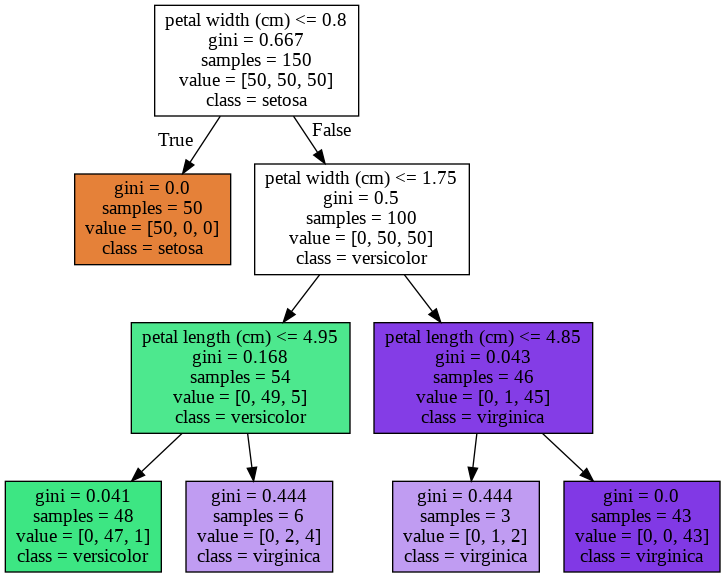

In [44]:
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from sklearn.externals.six import StringIO

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [45]:
!pip install dtreeviz

  Stored in directory: /root/.cache/pip/wheels/4c/3f/87/b2c828617d1bd181145fbaf41129e4c82fa8d9a98082701e00
Successfully built dtreeviz


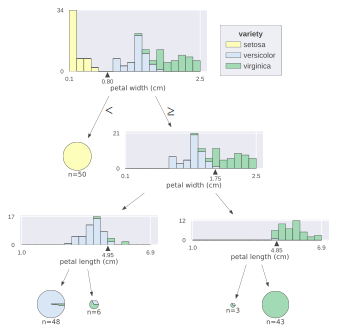

In [49]:
from dtreeviz.trees import dtreeviz
from IPython.display import display

viz = dtreeviz(
    clf,
    iris.data, 
    iris.target,
    target_name='variety',
    feature_names=iris.feature_names,
    class_names=[str(i) for i in iris.target_names],
) 

display(viz)